# Data Extraction

Notes:
1. The code assumes that the order of the columns remain the same i.e., columns 14:24 are items from the Updated Dogmatism Scale and they remain in the same order
2. The code assumes that other than the demo questionnaires, everything else requires an answer and the answer format has not changed - please notify if else
3. Code has not yet accounted for 'other' answers under the sex, gender, diagnoses, and stimulants section - need to discusss to streamline the output
4. Readability and flexibility is prioritised (or attempting to), if there are any parts that are unreadable or is difficult to troubleshoot due to foreseeable issues, please lmk
5. Because of the way Jupyter works, if you've run a column and go back and run previous columns, the output may not be correct and/or an error may pop up - I've tried reducing the occurence as much as possible but the safest option is to re-run the code from the respective header/section 

---

# Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, date, timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
os.chdir('/home/pavgreen/Documents/Amodio')
dforig = pd.read_csv('EEGMANYLABS_Responses.csv')
dforig

,Timestamp,Please enter your participant number,When is your date of birth?,Which sex were you assigned at birth?,What is your gender?,Do you have a diagnosis of psychiatric or neurological conditions?,"If you responded 'yes' to the previous question, please indicate the diagnosis received.",Are you currently taking any psychiatric medication?,"If you responded 'yes' to the previous question, please indicate the medication.","Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?",...,Upset,Hostile,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Afraid,Active
0,17/06/2023 20:51:03,90210,01/01/1999,Male,Male,No,NaN,No,NaN,No,...,1,2,3,4,5,1,2,3,4,5
1,17/06/2023 21:10:06,21,02/03/2003,Female,Female,No,NaN,No,NaN,Yes,...,3,3,4,3,3,2,3,3,3,3


In [3]:
dfmind = pd.read_csv('Mindfulness_Responses.csv')
dfmind

,Timestamp,Please enter your participant number,Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Throwing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Toothbrush],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Spoon],"Have you ever practiced meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, please briefly describe the kind of practice you engage in most frequently","If you responded 'yes' to the previous question, what is the total length of time (in months) you practiced/have been practicing meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, which option best describes the frequency of your typical practice of meditation, mindfulness, or contemplative prayer?",...,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I have disturbing thoughts.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I take disappointments so keenly I can't put them out of my mind.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am a steady person.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I get in a state of tension or turmoil as I think over my recent concerns and interests.]
0,17/06/2023 21:12:38,90210,Both equally,Usually Left,Both equally,Both equally,No,NaN,NaN,Not currently practicing,...,Moderately so,Not at all,Very much so,Very much so,Very much so,Very much so,Moderately so,Somewhat,Moderately so,Moderately so
1,17/06/2023 21:32:40,21,Always Right,Always Right,Always Right,Always Right,Yes,Meditation,1 month,Not currently practicing,...,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so


In [4]:
dforig = dforig.merge(dfmind, on = "Please enter your participant number")
dforig

,Timestamp_x,Please enter your participant number,When is your date of birth?,Which sex were you assigned at birth?,What is your gender?,Do you have a diagnosis of psychiatric or neurological conditions?,"If you responded 'yes' to the previous question, please indicate the diagnosis received.",Are you currently taking any psychiatric medication?,"If you responded 'yes' to the previous question, please indicate the medication.","Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?",...,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I have disturbing thoughts.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I take disappointments so keenly I can't put them out of my mind.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am a steady person.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I get in a state of tension or turmoil as I think over my recent concerns and interests.]
0,17/06/2023 20:51:03,90210,01/01/1999,Male,Male,No,NaN,No,NaN,No,...,Moderately so,Not at all,Very much so,Very much so,Very much so,Very much so,Moderately so,Somewhat,Moderately so,Moderately so
1,17/06/2023 21:10:06,21,02/03/2003,Female,Female,No,NaN,No,NaN,Yes,...,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so,Moderately so


---

## Functions

### All of these functions assumes numpy array | Tried class methods but too messy, may reconsider

#### Sum Whole Array

In [5]:
def swa(na):
    return np.round(np.sum(na),3)

#### Sum Columns

In [6]:
def sc(na):
    return np.round(np.sum(na, axis=0),3)

#### Sum Rows

In [7]:
def sr(na):
    return np.round(np.sum(na, axis=1),3)

#### Mean Whole Array

In [8]:
def mwa(na):
    return np.round(np.mean(na), 3)

#### Mean Columns

In [9]:
def mc(na):
    return np.round(np.mean(na, axis=0), 3)

#### Mean Rows

In [10]:
def mr(na):
    return np.round(np.mean(na, axis=1), 3)

#### SD Whole Array

In [11]:
def sdwa(na):
    return np.round(np.std(na), 3)

#### SD Columns

In [12]:
def sdc(na):
    return np.round(np.std(na, axis=0), 3)

#### SD Rows

In [13]:
def sdr(na):
    return np.round(np.std(na, axis=1), 3)

---

## Age, Sex, and Gender

### Sex and Gender

In [14]:
dfasg = dforig.iloc[:, 2:5]
dfasg

,When is your date of birth?,Which sex were you assigned at birth?,What is your gender?
0,01/01/1999,Male,Male
1,02/03/2003,Female,Female


#### Count

In [15]:
dfc = dfasg.groupby(dfasg.columns[1:3].tolist()).size()
dfc

Which sex were you assigned at birth?  What is your gender?
Female                                 Female                  1
Male                                   Male                    1
dtype: int64

<AxesSubplot:title={'center':'Sex and Gender'}, xlabel='Sex and Gender', ylabel='Number'>

(array([0, 1]), [Text(0, 0, '(Female, Female)'), Text(1, 0, '(Male, Male)')])

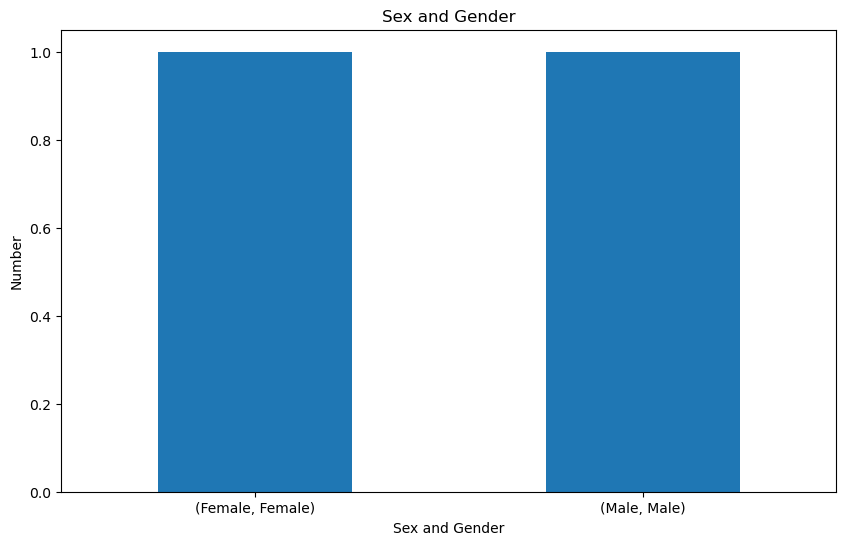

In [16]:
dfc.plot(kind='bar', title='Sex and Gender', ylabel='Number', xlabel='Sex and Gender', figsize=(10, 6))
plt.xticks(rotation=0)

### Age

In [17]:
def ymd(dt):
    bday = datetime.strptime(dt, "%d/%m/%Y").date()
    today = date.today()
    year = timedelta(days=365)
    age = (today-bday)//year
    return(age)

In [18]:
dfasg['Age'] = dfasg.iloc[:, 0].apply(ymd)
dfasg

,When is your date of birth?,Which sex were you assigned at birth?,What is your gender?,Age
0,01/01/1999,Male,Male,24
1,02/03/2003,Female,Female,20


#### Mean, Standard Deviation

In [19]:
age = np.array(dfasg['Age'])
print(f'Mean: {mwa(age)} | SD: {sdwa(age)}')

Mean: 22.0 | SD: 2.0


<BarContainer object of 2 artists>

Text(0, 0.5, 'Years')

Text(0.5, 1.0, 'Age')

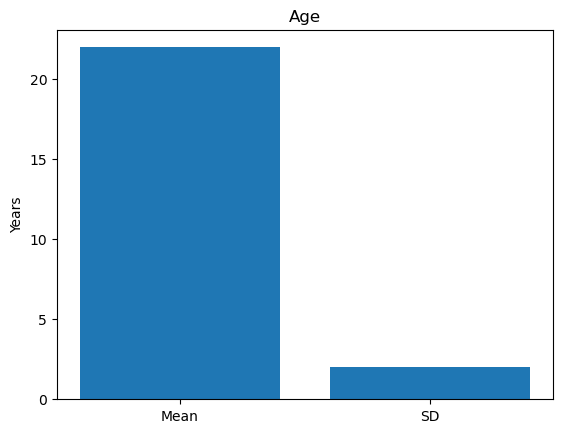

In [20]:
plt.bar(['Mean', 'SD'] , [mwa(age), sdwa(age)])
plt.ylabel('Years')
plt.title('Age')

---

## Diagnoses, Medication, and Stimulants

In [21]:
dfdns = dforig.iloc[:, 5:11]
dfdns

,Do you have a diagnosis of psychiatric or neurological conditions?,"If you responded 'yes' to the previous question, please indicate the diagnosis received.",Are you currently taking any psychiatric medication?,"If you responded 'yes' to the previous question, please indicate the medication.","Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?","If you responded 'yes' to the previous question, please write below what you have consumed"
0,No,NaN,No,NaN,No,NaN
1,No,NaN,No,NaN,Yes,Cocktail


### Diagnoses

#### Count in total, Responses if Yes, and Index if Yes

In [22]:
dfdns.iloc[:, 0].value_counts()

# Responses if yes
dfdns.iloc[:, 1].value_counts()

# Take note of index if yes 
dfdns.index[dfdns.iloc[:, 0] == 'Yes'].tolist()

No    2
Name: Do you have a diagnosis of psychiatric or neurological conditions?, dtype: int64

Series([], Name: If you responded 'yes' to the previous question, please indicate the diagnosis received., dtype: int64)

[]

## Medication

In [23]:
dfdns.iloc[:, 2].value_counts()

# Responses if yes
dfdns.iloc[:, 3].value_counts()

# Take note of index if yes 
dfdns.index[dfdns.iloc[:, 2] == 'Yes'].tolist()

No    2
Name: Are you currently taking any psychiatric medication? , dtype: int64

Series([], Name: If you responded 'yes' to the previous question, please indicate the medication. , dtype: int64)

[]

### Stimulants

#### Count in total, Responses if Yes, and Index if Yes

In [24]:
dfdns.iloc[:, 4].value_counts()

# Should probably consider the categorisation of common responses i.e., Coffee, Tea)
dfdns.iloc[:, 5].value_counts()

# Take note of index if yes
dfdns.index[dfdns.iloc[:, 4] == 'Yes'].tolist()

No     1
Yes    1
Name: Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?, dtype: int64

Cocktail    1
Name: If you responded 'yes' to the previous question, please write below what you have consumed, dtype: int64

[1]

---

## One-Item liberalism vs Conservatism Scale

In [25]:
dfolc = dforig.iloc[:, 11]
dfolc

0   -4
1    1
Name: Instructions: Please indicate your political orientation on the scale below. [Political Orientation], dtype: int64

### Descriptive Statistics

In [26]:
olc = np.array(dfolc)
dfolc.value_counts()
print(f'Mean: {mwa(olc)} | SD: {sdwa(olc)}')

-4    1
 1    1
Name: Instructions: Please indicate your political orientation on the scale below. [Political Orientation], dtype: int64

Mean: -1.5 | SD: 2.5


---

## Updated Dogmatism Scale

### Original Scores

In [27]:
dfuds = dforig.iloc[:, 12:23]
dfuds

,People who disagree with me are usually wrong.,Having multiple perspectives on an issue is usually desirable.,There is a single correct way to do most things.,Diversity of opinion and background is valuable in any group or organization.,It is important to be open to different points of view.,I am a ‘‘my way or the highway’’ type of person.,There are often many different acceptable ways to solve a problem.,I consider myself to be very open-minded.,Different points of views should be encouraged.,People who are very different from us can be dangerous.,I am ‘‘set in my ways”.
0,1,2,3,4,5,1,2,3,4,5,1
1,3,2,4,2,3,3,2,3,3,4,3


### Reverse Scoring

In [28]:
dfuds.iloc[:, [1, 3, 4, 6, 7, 8]] = 6 - dfuds.iloc[:, [1, 3, 4, 6, 7, 8]]
dfuds

,People who disagree with me are usually wrong.,Having multiple perspectives on an issue is usually desirable.,There is a single correct way to do most things.,Diversity of opinion and background is valuable in any group or organization.,It is important to be open to different points of view.,I am a ‘‘my way or the highway’’ type of person.,There are often many different acceptable ways to solve a problem.,I consider myself to be very open-minded.,Different points of views should be encouraged.,People who are very different from us can be dangerous.,I am ‘‘set in my ways”.
0,1,4,3,2,1,1,4,3,2,5,1
1,3,4,4,4,3,3,4,3,3,4,3


### Descriptive Statistics

In [29]:
udsr = np.array(dfuds.iloc[:, :11])
dfuds['Total'] = sr(udsr)
dfuds['Mean'] = mr(udsr)
dfuds

,People who disagree with me are usually wrong.,Having multiple perspectives on an issue is usually desirable.,There is a single correct way to do most things.,Diversity of opinion and background is valuable in any group or organization.,It is important to be open to different points of view.,I am a ‘‘my way or the highway’’ type of person.,There are often many different acceptable ways to solve a problem.,I consider myself to be very open-minded.,Different points of views should be encouraged.,People who are very different from us can be dangerous.,I am ‘‘set in my ways”.,Total,Mean
0,1,4,3,2,1,1,4,3,2,5,1,27,2.455
1,3,4,4,4,3,3,4,3,3,4,3,38,3.455


<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Mean Composite Scores Across All Items')

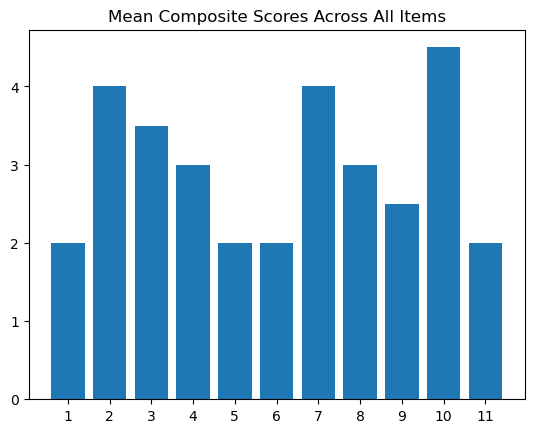

In [30]:
sudsr = np.array(dfuds.iloc[:, :11])
plt.bar(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
        mc(sudsr))
plt.title('Mean Composite Scores Across All Items')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Total Per Participant')

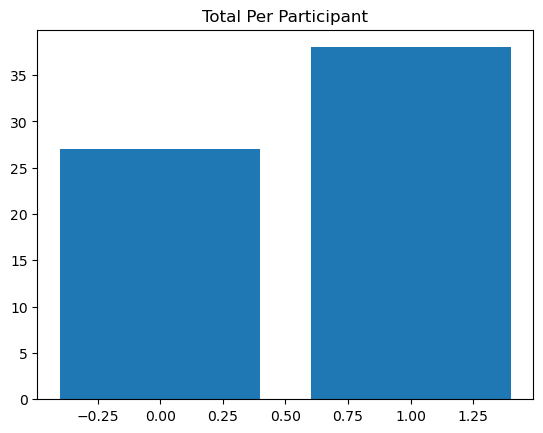

In [31]:
plt.bar(dfuds.index.tolist(), dfuds.iloc[:,11])
plt.title('Total Per Participant')

---

## Centrality of Religious Scale - 5

#### Coding freq based on [Huber and Huber (2012)](https://www.mdpi.com/2077-1444/3/3/710)

### Original Scoring

In [32]:
dfcrs = dforig.iloc[:, 23:28]
dfcrs

,How often do you think about religious issues? [How often do you think about religious issues?],To what extent do you believe that God or something divine exists? [To what extent do you believe that God or something divine exists?],How often do you take part in religious services? [How often do you take part in religious services?],How often do you pray? [How often do you pray?],How often do you experience situations in which you have the feeling that God or something divine intervenes in your life? [How often do you experience situations in which you have the feeling that God or something divine intervenes in your life?]
0,2 (Rarely),3 (Moderately),4 (Often),5 (Very Often),1 (Never)
1,2 (Rarely),3 (Moderately),2 (Rarely),4 (Often),3 (Occasionally)


### Mapped and Named

In [33]:
dfcrs.rename(columns = {
                        dfcrs.columns[0]: 'Intellect', 
                        dfcrs.columns[1]: 'Ideology', 
                        dfcrs.columns[2]: 'Public Practice', 
                        dfcrs.columns[3]: 'Private Practice', 
                        dfcrs.columns[4]: 'Experience'},
             inplace = True)

scoring = {**dict.fromkeys(['1 (Never)', '1 (Not at all)'], 1), 
           **dict.fromkeys(['2 (Rarely)', '2 (Not very much)'], 2), 
           **dict.fromkeys(['3 (Occasionally)', '3 (Moderately)'], 3),
           **dict.fromkeys(['4 (Often)', '4 (Quite a bit)'], 4),
           **dict.fromkeys(['5 (Very Often)', '5 (Very much so)'], 5)
          }

dfcrs.replace(scoring, inplace = True)
dfcrs

,Intellect,Ideology,Public Practice,Private Practice,Experience
0,2,3,4,5,1
1,2,3,2,4,3


### Descriptive Stats 

In [34]:
crsd = np.array(dfcrs)
dfcrs['Religious Score(M)'] = mr(crsd)
crsd = np.array(dfcrs)

stacked = np.stack((sc(crsd), mc(crsd)))
sum_mean = pd.DataFrame(stacked, index = ['Sum', 'Mean'], columns = dfcrs.columns)

In [35]:
def rel(df):
    if df < 2.1:
        return "Not-religious"
    elif df > 2.0 and df < 4.0:
        return "Religious"
    elif df > 3.9:
        return "Highly Religious"

dfcrs['Religiosity'] = dfcrs['Religious Score(M)'].apply(rel)
dfcrs

,Intellect,Ideology,Public Practice,Private Practice,Experience,Religious Score(M),Religiosity
0,2,3,4,5,1,3.0,Religious
1,2,3,2,4,3,2.8,Religious


In [36]:
sum_mean
x = np.array(dfcrs['Religious Score(M)'])
print(f'Standard Deviation of Religious Score: {sdwa(np.array(x))}')

,Intellect,Ideology,Public Practice,Private Practice,Experience,Religious Score(M)
Sum,4.0,6.0,6.0,9.0,4.0,5.8
Mean,2.0,3.0,3.0,4.5,2.0,2.9


Standard Deviation of Religious Score: 0.1


<AxesSubplot:title={'center':'Mean Scores'}, ylabel='Score'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intellect'),
  Text(1, 0, 'Ideology'),
  Text(2, 0, 'Public Practice'),
  Text(3, 0, 'Private Practice'),
  Text(4, 0, 'Experience'),
  Text(5, 0, 'Religious Score(M)')])

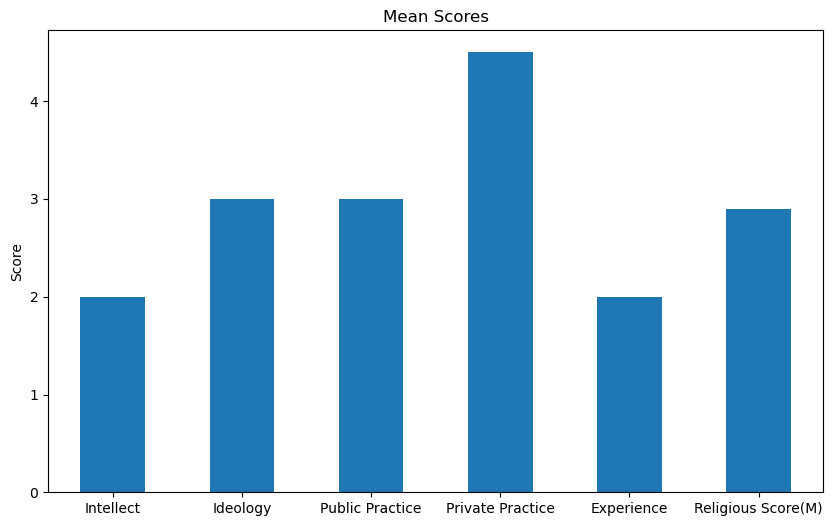

In [37]:
sum_mean.iloc[1, :].plot(kind = 'bar', title='Mean Scores', ylabel='Score', figsize=(10, 6))
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'Religiosity Frequency'}, ylabel='Frequency'>

(array([0]), [Text(0, 0, 'Religious')])

Religious    2
Name: Religiosity, dtype: int64

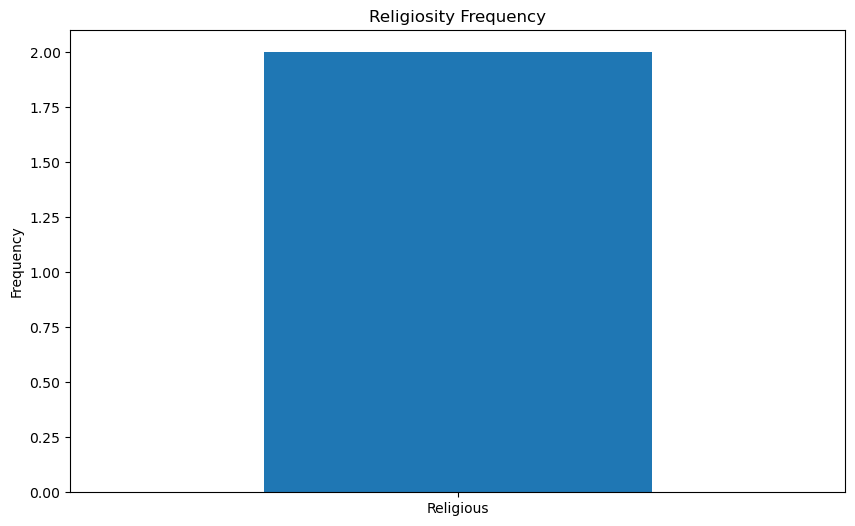

In [38]:
dfcrs['Religiosity'].value_counts().plot(kind = 'bar', title='Religiosity Frequency', ylabel='Frequency', figsize=(10, 6))
plt.xticks(rotation=0)

dfcrs['Religiosity'].value_counts()

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Mean Per Participant')

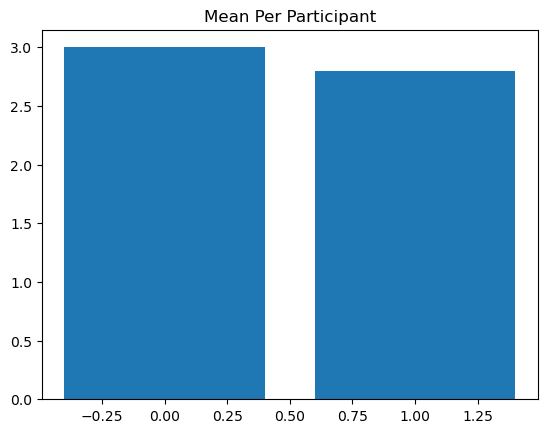

In [39]:
plt.bar(dfcrs.index.tolist(), dfcrs['Religious Score(M)'])
plt.title('Mean Per Participant')

---

## Intolerance of Uncertainty Scale - Short Version

### Original Scores

In [40]:
dfius = dforig.iloc[:, 28:40]
dfius

,Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.],Please choose the number that best corresponds to how much you agree with each point. [It frustrates me not having all the information I need.],Please choose the number that best corresponds to how much you agree with each point. [One should always look ahead so as to avoid surprises.],"Please choose the number that best corresponds to how much you agree with each point. [A small, unforeseen event can spoil everything, even with the best of planning.]",Please choose the number that best corresponds to how much you agree with each point. [I always want to know what the future has in store for me.],Please choose the number that best corresponds to how much you agree with each point. [I can’t stand being taken by surprise.],Please choose the number that best corresponds to how much you agree with each point. [I should be able to organize everything in advance],Please choose the number that best corresponds to how much you agree with each point. [Uncertainty keeps me from living a full life.],"Please choose the number that best corresponds to how much you agree with each point. [When it’s time to act, uncertainty paralyzes me.]",Please choose the number that best corresponds to how much you agree with each point. [When I am uncertain I can’t function very well.],Please choose the number that best corresponds to how much you agree with each point. [The smallest doubt can stop me from acting.],Please choose the number that best corresponds to how much you agree with each point. [I must get away from all uncertain situations.]
0,2,3 (Somewhat characteristic of me),4,5 (Entirely characteristic of me),1 (Not at all characteristic of me),2,3 (Somewhat characteristic of me),4,5 (Entirely characteristic of me),1 (Not at all characteristic of me),2,3 (Somewhat characteristic of me)
1,2,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),4,2,2,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),4,3 (Somewhat characteristic of me),3 (Somewhat characteristic of me),4


### Mapped and Inted

In [41]:
dius = {
        '3 (Somewhat characteristic of me)': 3,
        '5 (Entirely characteristic of me)': 5,
        '1 (Not at all characteristic of me)': 1
       }

dfius.replace(dius, inplace=True)
dfius = dfius.astype('int64')
dfius

,Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.],Please choose the number that best corresponds to how much you agree with each point. [It frustrates me not having all the information I need.],Please choose the number that best corresponds to how much you agree with each point. [One should always look ahead so as to avoid surprises.],"Please choose the number that best corresponds to how much you agree with each point. [A small, unforeseen event can spoil everything, even with the best of planning.]",Please choose the number that best corresponds to how much you agree with each point. [I always want to know what the future has in store for me.],Please choose the number that best corresponds to how much you agree with each point. [I can’t stand being taken by surprise.],Please choose the number that best corresponds to how much you agree with each point. [I should be able to organize everything in advance],Please choose the number that best corresponds to how much you agree with each point. [Uncertainty keeps me from living a full life.],"Please choose the number that best corresponds to how much you agree with each point. [When it’s time to act, uncertainty paralyzes me.]",Please choose the number that best corresponds to how much you agree with each point. [When I am uncertain I can’t function very well.],Please choose the number that best corresponds to how much you agree with each point. [The smallest doubt can stop me from acting.],Please choose the number that best corresponds to how much you agree with each point. [I must get away from all uncertain situations.]
0,2,3,4,5,1,2,3,4,5,1,2,3
1,2,3,3,4,2,2,3,3,4,3,3,4


### Descriptive Stats

In [42]:
ius_arr = np.array(dfius.iloc[:, :12])
prox_anx_arr = np.array(dfius.iloc[:, :7])
inhib_anx_arr = np.array(dfius.iloc[:, 7:12])

stk = np.stack((sr(prox_anx_arr), sr(inhib_anx_arr), sr(ius_arr)), axis=1)

stacked = pd.DataFrame(stk, columns=['Sum Prospec Anx', 'Sum Inhib Anx', 'Total IUS'])
dfius = pd.concat([dfius, stacked], axis=1)

dfius

,Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.],Please choose the number that best corresponds to how much you agree with each point. [It frustrates me not having all the information I need.],Please choose the number that best corresponds to how much you agree with each point. [One should always look ahead so as to avoid surprises.],"Please choose the number that best corresponds to how much you agree with each point. [A small, unforeseen event can spoil everything, even with the best of planning.]",Please choose the number that best corresponds to how much you agree with each point. [I always want to know what the future has in store for me.],Please choose the number that best corresponds to how much you agree with each point. [I can’t stand being taken by surprise.],Please choose the number that best corresponds to how much you agree with each point. [I should be able to organize everything in advance],Please choose the number that best corresponds to how much you agree with each point. [Uncertainty keeps me from living a full life.],"Please choose the number that best corresponds to how much you agree with each point. [When it’s time to act, uncertainty paralyzes me.]",Please choose the number that best corresponds to how much you agree with each point. [When I am uncertain I can’t function very well.],Please choose the number that best corresponds to how much you agree with each point. [The smallest doubt can stop me from acting.],Please choose the number that best corresponds to how much you agree with each point. [I must get away from all uncertain situations.],Sum Prospec Anx,Sum Inhib Anx,Total IUS
0,2,3,4,5,1,2,3,4,5,1,2,3,20,15,35
1,2,3,3,4,2,2,3,3,4,3,3,4,19,17,36


In [43]:
tiusarr = np.array(dfius.iloc[:, 12:15])

print(f'IUS Composite Sum: {swa(tiusarr[:, 2])} | Prospective Anxiety Sum: {swa(tiusarr[:, 0])} | Inhibitory Anxiety Sum: {swa(tiusarr[:, 1])}')
print(f'IUS Composite Mean: {mwa(tiusarr[:, 2])} | Prospective Anxiety Mean: {mwa(tiusarr[:, 0])} | Inhibitory Anxiety Mean: {mwa(tiusarr[:, 1])}')
print(f'IUS SD Across Participants: {sdwa(tiusarr[:, 2])} | Prospective Anxiety SD: {sdwa(tiusarr[:, 0])} | Inhibitory Anxiety SD: {sdwa(tiusarr[:, 1])}')

IUS Composite Sum: 71 | Prospective Anxiety Sum: 39 | Inhibitory Anxiety Sum: 32
IUS Composite Mean: 35.5 | Prospective Anxiety Mean: 19.5 | Inhibitory Anxiety Mean: 16.0
IUS SD Across Participants: 0.5 | Prospective Anxiety SD: 0.5 | Inhibitory Anxiety SD: 1.0


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

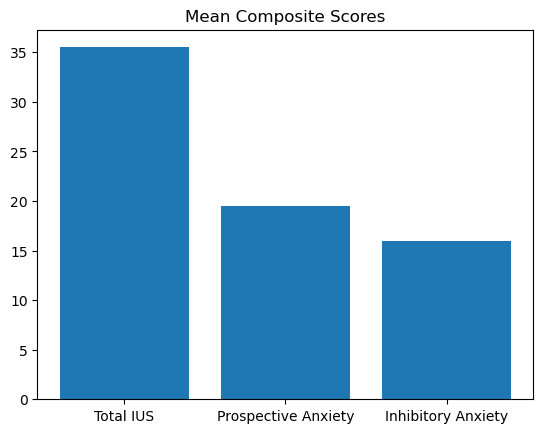

In [44]:
plt.bar(['Total IUS', 'Prospective Anxiety', 'Inhibitory Anxiety'], [mwa(tiusarr[:, 2]), mwa(tiusarr[:, 0]), mwa(tiusarr[:, 1])])
plt.title('Mean Composite Scores')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Sum Prospec Anx Per Participant')

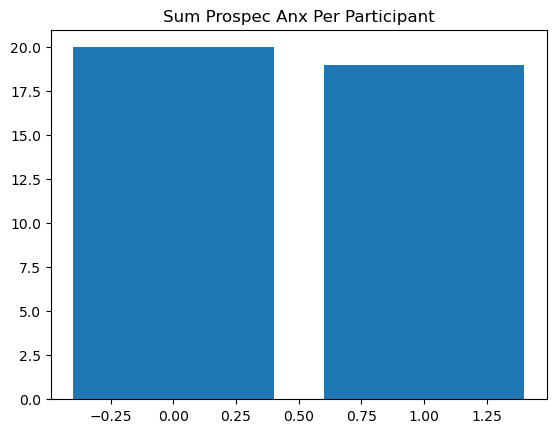

In [45]:
plt.bar(dfius.index.tolist(), dfius['Sum Prospec Anx'])
plt.title('Sum Prospec Anx Per Participant')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Sum Inhib Anx Per Participant')

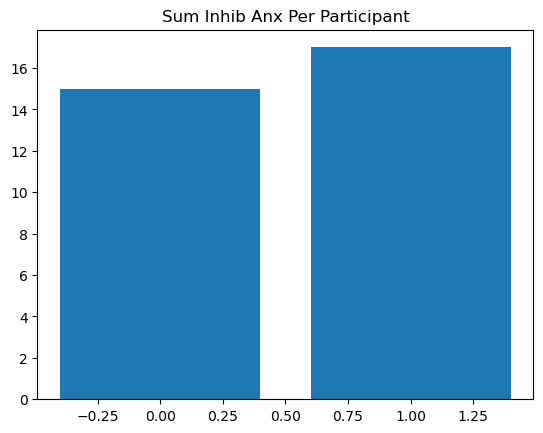

In [46]:
plt.bar(dfius.index.tolist(), dfius['Sum Inhib Anx'])
plt.title('Sum Inhib Anx Per Participant')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Total IUS Per Participant')

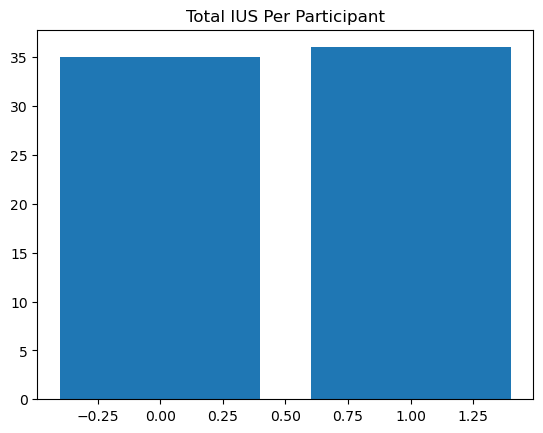

In [47]:
plt.bar(dfius.index.tolist(), dfius['Total IUS'])
plt.title('Total IUS Per Participant')

---

## Social and Economic Conservatism Scale

### Original Scale

In [48]:
dfsec = dforig.iloc[:, 40:52]
dfsec

,"Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Abortion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Limited government.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Military and national security.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Religion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Welfare benefits.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Gun ownership.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional marriage.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional values.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Fiscal responsibility.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Business.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [The family unit.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Patriotism.]"
0,0 (Negative),10,20,30,40,50 (Neutral),60,70,0 (Negative),10,20,30
1,40,30,10,30,20,30,20,40,40,60,0 (Negative),50 (Neutral)


### Mapped, Inted and Reversed

In [49]:
map = {'100 (Positive)': 100,
       '50 (Neutral)': 50,
       '0 (Negative)': 0
      }

dfsec.replace(map, inplace=True)
dfsec = dfsec.astype('int64')

dfsec.iloc[:, [0, 4]] = 100 - dfsec.iloc[:, [0, 4]]

dfsec

,"Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Abortion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Limited government.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Military and national security.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Religion.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Welfare benefits.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Gun ownership.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional marriage.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Traditional values.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Fiscal responsibility.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Business.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [The family unit.]","Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Patriotism.]"
0,100,10,20,30,60,50,60,70,0,10,20,30
1,60,30,10,30,80,30,20,40,40,60,0,50


### Descriptive Statistics

In [50]:
secs_arr = np.array(dfsec.iloc[:, :12])
ssecs = secs_arr[:, [0, 10, 3, 6, 7, 11, 2]]
esecs = secs_arr[:, [1, 4, 5, 8, 9]]

sum_stack = np.stack((sr(ssecs), sr(esecs), sr(secs_arr)), axis=1)
mean_stack = np.stack((mr(ssecs), mr(esecs), mr(secs_arr)), axis=1)

scsecs = pd.concat([pd.DataFrame(sum_stack, columns=['Sum Social Con', 'Sum Eco Con', 'Sum SECS']), 
                    pd.DataFrame(mean_stack, columns=['Mean Social Con', 'Mean Eco Con', 'Mean SECS'])],
                    axis=1)

scsecs

,Sum Social Con,Sum Eco Con,Sum SECS,Mean Social Con,Mean Eco Con,Mean SECS
0,330,130,460,47.143,26.0,38.333
1,210,240,450,30.000,48.0,37.500


In [51]:
n = '\n'
print(f'Standard Deviation In Order of Table: {n}{sdwa(sum_stack[:, 0])} | {sdwa(sum_stack[:, 1])} | {sdwa(sum_stack[:, 2])}{n}{sdwa(mean_stack[:, 0])} | {sdwa(mean_stack[:, 1])} | {sdwa(mean_stack[:, 2])}')

Standard Deviation In Order of Table: 
60.0 | 55.0 | 5.0
8.572 | 11.0 | 0.416


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

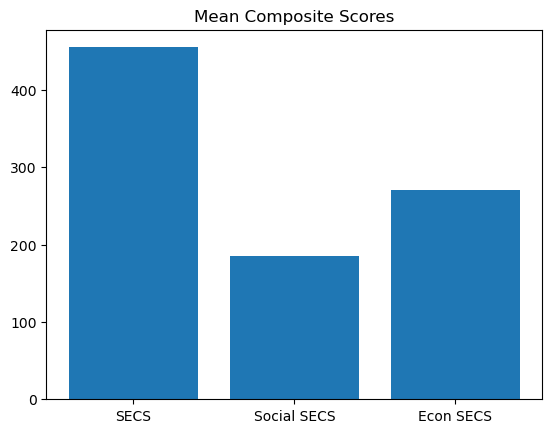

In [52]:
plt.bar(['SECS', 'Social SECS', 'Econ SECS'], [mwa(sum_stack[:, 2]), mwa(sum_stack[:, 1]), mwa(sum_stack[:, 0])])
plt.title('Mean Composite Scores')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Mean Social Con Per Participant')

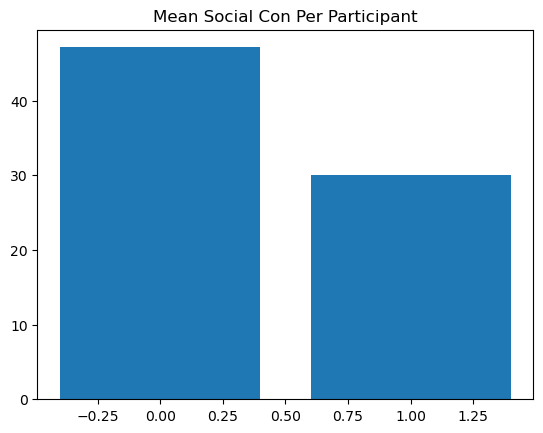

In [53]:
plt.bar(scsecs.index.tolist(), scsecs['Mean Social Con'])
plt.title('Mean Social Con Per Participant')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Mean Eco Con Per Participant')

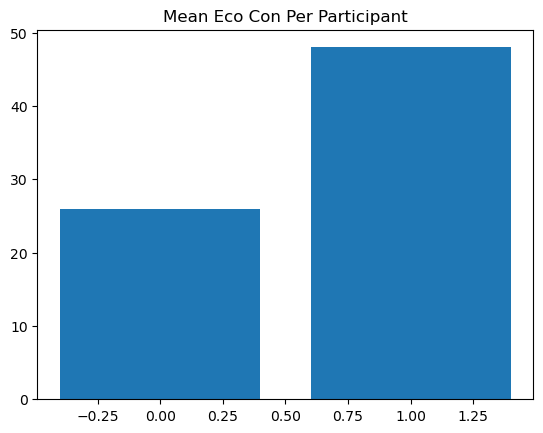

In [54]:
plt.bar(scsecs.index.tolist(), scsecs['Mean Eco Con'])
plt.title('Mean Eco Con Per Participant')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Mean SECS Per Participant')

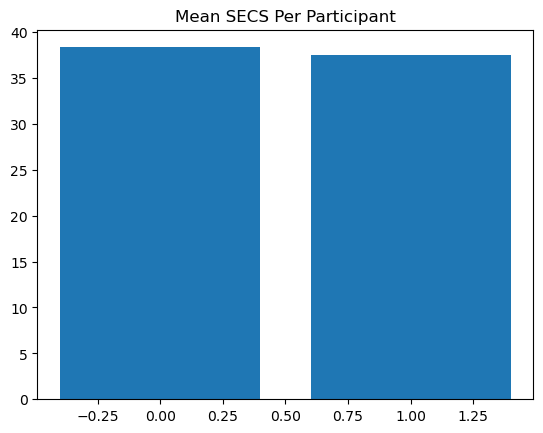

In [55]:
plt.bar(scsecs.index.tolist(), scsecs['Mean SECS'])
plt.title('Mean SECS Per Participant')

---

## Right Wing Authoritarianism 3-Dimensional Scale

### Original Scale

In [56]:
dfrwa = dforig.iloc[:, 52:64]
dfrwa

,"People should develop their own personal standards about good and evil and pay less attention to the Bible and other old, traditional forms of religious guidance.",What our country really needs instead of more “civil rights” is a good stiff dose of law and order.,The days when women are submissive should belong strictly in the past. A “woman’s place” in society should be wherever she wants to be.,The withdrawal from tradition will turn out to be a fatal fault one day.,There is no such crime to justify capital punishment.,Obedience and respect for authority are the most important values children should learn.,Homosexual long-term relationships should be treated as equivalent to marriage.,"What our country really needs is a strong, determined Chancellor which will crush the evil and set us on our right way again.",It is good that nowadays young people have greater freedom “to make their own rules” and to protest against things they don’t like.,Being virtuous and law-abiding is in the long run better for us than permanently challenging the foundation of our society.,It is important to protect the rights of radicals and deviants in all ways.,"The real keys to the “good life” are obedience, discipline, and virtue."
0,1,2,3,4,5,6,7,1,2,3,4,5
1,3,4,5,5,3,5,5,5,2,4,5,4


### Reversed

In [57]:
dfrwa.iloc[:, [4, 10, 2, 8, 0, 6]] = 8 - dfrwa.iloc[:, [4, 10, 2, 8, 0, 6]]
dfrwa

,"People should develop their own personal standards about good and evil and pay less attention to the Bible and other old, traditional forms of religious guidance.",What our country really needs instead of more “civil rights” is a good stiff dose of law and order.,The days when women are submissive should belong strictly in the past. A “woman’s place” in society should be wherever she wants to be.,The withdrawal from tradition will turn out to be a fatal fault one day.,There is no such crime to justify capital punishment.,Obedience and respect for authority are the most important values children should learn.,Homosexual long-term relationships should be treated as equivalent to marriage.,"What our country really needs is a strong, determined Chancellor which will crush the evil and set us on our right way again.",It is good that nowadays young people have greater freedom “to make their own rules” and to protest against things they don’t like.,Being virtuous and law-abiding is in the long run better for us than permanently challenging the foundation of our society.,It is important to protect the rights of radicals and deviants in all ways.,"The real keys to the “good life” are obedience, discipline, and virtue."
0,7,2,5,4,3,6,1,1,6,3,4,5
1,5,4,3,5,5,5,3,5,6,4,3,4


### Descriptive Statistics

In [58]:
rwa_array = np.array(dfrwa)
agg = rwa_array[:, [1, 7, 4, 10]]
sub = rwa_array[:, [5, 11, 2, 8]]
conv = rwa_array[:, [3, 9, 0, 6]]

sum_stack = np.stack([sr(agg), sr(sub), sr(conv), sr(rwa_array)], axis=1)
mean_stack = np.stack([mr(agg), mr(sub), mr(conv), mr(rwa_array)], axis=1)

res = pd.concat([pd.DataFrame(sum_stack, columns=['Aggression Sum', 'Submission Sum', 'Conventionalism Sum', 'RWA Sum']),
                 pd.DataFrame(mean_stack, columns=['Aggression Mean', 'Submission Mean', 'Conventionalism Mean', 'RWA Mean'])],
                 axis=1)
res

,Aggression Sum,Submission Sum,Conventionalism Sum,RWA Sum,Aggression Mean,Submission Mean,Conventionalism Mean,RWA Mean
0,10,22,15,47,2.50,5.5,3.75,3.917
1,17,18,17,52,4.25,4.5,4.25,4.333


<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Mean Across All Participants')

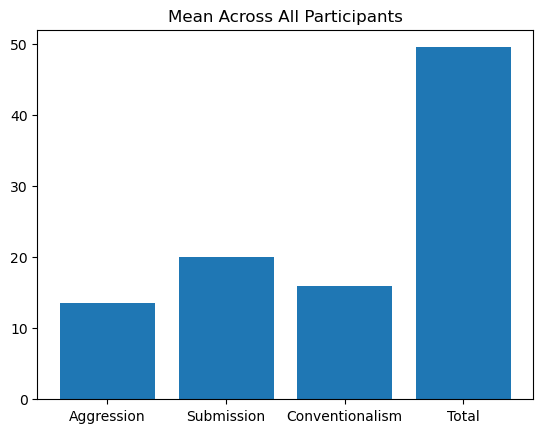

In [59]:
plt.bar(['Aggression', 'Submission', 'Conventionalism', 'Total'], [mwa(sum_stack[:, 0]), mwa(sum_stack[:, 1]), mwa(sum_stack[:, 2]), mwa(sum_stack[:, 3])])
plt.title('Mean Across All Participants')

---

## Social Dominance Orientation Scale

### Original Scale

In [60]:
dfsdo = dforig.iloc[:, 64:72]
dfsdo

,Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [An ideal society requires some groups to be on top and others to be on the bottom.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Some groups of people are simply inferior to other groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [No one group should dominate in society.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Groups at the bottom are just as deserving as groups at the top.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Group equality should not be our primary goal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [It is unjust to try to make groups equal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should do what we can to equalize conditions for different groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should work to give all groups an equal chance to succeed.]
0,1 (Strongly Oppose),2 (Somewhat Oppose),3 (Slightly Oppose),4 (Neutral),5 (Slightly Favour),6 (Somewhat Favour),7 (Strongly Favour),1 (Strongly Oppose)
1,2 (Somewhat Oppose),6 (Somewhat Favour),3 (Slightly Oppose),5 (Slightly Favour),7 (Strongly Favour),7 (Strongly Favour),5 (Slightly Favour),3 (Slightly Oppose)


### Mapped and Reversed

In [61]:
map = {'1 (Strongly Oppose)': 1,
       '2 (Somewhat Oppose)': 2,
       '3 (Slightly Oppose)': 3,
       '4 (Neutral)': 4,
       '5 (Slightly Favour)': 5,
       '6 (Somewhat Favour)': 6,
       '7 (Strongly Favour)': 7
      }

dfsdo.replace(map, inplace=True)

dfsdo.iloc[:, [2, 3, 6, 7]] = 8 - dfsdo.iloc[:, [2, 3, 6, 7]]

dfsdo

,Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [An ideal society requires some groups to be on top and others to be on the bottom.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Some groups of people are simply inferior to other groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [No one group should dominate in society.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Groups at the bottom are just as deserving as groups at the top.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [Group equality should not be our primary goal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [It is unjust to try to make groups equal.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should do what we can to equalize conditions for different groups.],Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [We should work to give all groups an equal chance to succeed.]
0,1,2,5,4,5,6,1,7
1,2,6,5,3,7,7,3,5


### Descriptive Statistics

In [62]:
sdo_array = np.array(dfsdo)
sdod = sdo_array[:, :4]
sdoe = sdo_array[:, 4:]

mean_stk = np.stack([mr(sdod), mr(sdoe), mr(sdo_array)], axis=1)
sum_stk = np.stack([sr(sdod), sr(sdoe), sr(sdo_array)], axis=1)

mean_sdo = pd.concat([(pd.DataFrame(sum_stk, columns=['Sum SDO-D', 'Sum SDO-E', 'Sum SDO'])), 
                      (pd.DataFrame(mean_stk, columns=['Mean SDO-D', 'Mean SDO-E', 'Mean SDO']))],
                     axis=1)
mean_sdo

,Sum SDO-D,Sum SDO-E,Sum SDO,Mean SDO-D,Mean SDO-E,Mean SDO
0,12,19,31,3.0,4.75,3.875
1,16,22,38,4.0,5.50,4.750


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

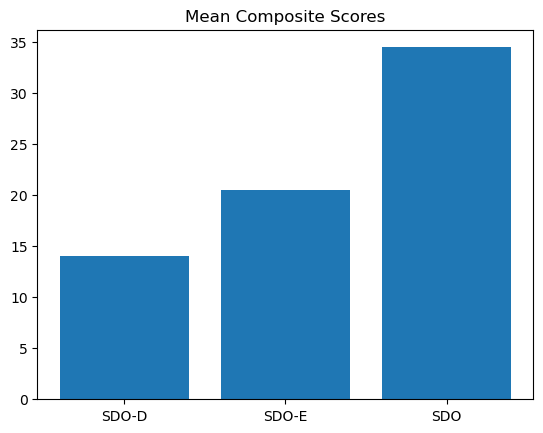

In [63]:
plt.bar(['SDO-D', 'SDO-E', 'SDO'], [mwa(sum_stk[:, 0]), mwa(sum_stk[:, 1]), mwa(sum_stk[:, 2])])
plt.title('Mean Composite Scores')

---

## Behavioural Inhibition System/Behavioural Activation System Scale

### Original Scale

In [64]:
dfbisbas = dforig.iloc[:, 72:92]
dfbisbas

,"Even if something bad is about to happen to me, I rarely experience fear or nervousness.",I go out of my way to get things I want.,"When I'm doing well at something, I love to keep at it.",I'm always willing to try something new if I think it will be fun.,"When I get something I want, I feel excited and energized.",Criticism or scolding hurts me quite a bit.,"When I want something, I usually go all-out to get it.",I will often do things for no other reason than that they might be fun.,"If I see a chance to get something I want, I move on it right away.",I feel pretty worried or upset when I think or know somebody is angry at me.,"When I see an opportunity for something I like, I get excited right away.",I often act on the spur of the moment.,"If I think something unpleasant is going to happen, I usually get pretty ""worked up.""","When good things happen to me, it affects me strongly.",I feel worried when I think I have done poorly at something.,I crave excitement and new sensations.,"When I go after something, I use a ""no holds barred"" approach.",I have very few fears compared to my friends.,It would excite me to win a contest.,I worry about making mistakes.
0,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4
1,1,2,1,2,1,4,3,2,2,3,3,3,3,3,3,2,2,2,3,3


### Inted and Reversed

In [65]:
keep = [col for col in range(len(dfbisbas.columns)) if col not in [0, 17]]
dfbisbas.iloc[:, keep] = 5 - dfbisbas.iloc[:, keep]

dfbisbas

,"Even if something bad is about to happen to me, I rarely experience fear or nervousness.",I go out of my way to get things I want.,"When I'm doing well at something, I love to keep at it.",I'm always willing to try something new if I think it will be fun.,"When I get something I want, I feel excited and energized.",Criticism or scolding hurts me quite a bit.,"When I want something, I usually go all-out to get it.",I will often do things for no other reason than that they might be fun.,"If I see a chance to get something I want, I move on it right away.",I feel pretty worried or upset when I think or know somebody is angry at me.,"When I see an opportunity for something I like, I get excited right away.",I often act on the spur of the moment.,"If I think something unpleasant is going to happen, I usually get pretty ""worked up.""","When good things happen to me, it affects me strongly.",I feel worried when I think I have done poorly at something.,I crave excitement and new sensations.,"When I go after something, I use a ""no holds barred"" approach.",I have very few fears compared to my friends.,It would excite me to win a contest.,I worry about making mistakes.
0,1,3,2,1,4,3,2,1,4,3,2,1,4,3,2,1,4,2,2,1
1,1,3,4,3,4,1,2,3,3,2,2,2,2,2,2,3,3,2,2,2


### Descriptive Statistics

In [66]:
sdo_array = np.array(dfbisbas)

basd = sr(sdo_array[:, [1, 6, 8, 16]])
basf = sr(sdo_array[:, [3, 7, 11, 15]])
basr = sr(sdo_array[:, [2, 4, 10, 13, 18]])
bis = sr(sdo_array[:, [0, 5, 9, 12, 14, 17, 19]])

basind = [col for col in range(len(dfbisbas.columns)) if col not in [0, 5, 9, 12, 14, 17, 19]]
basind = sr(sdo_array[:, basind])

subsdo = np.stack((basd, basf, basr, bis, basind), axis=1)

pd_subsdo = pd.DataFrame(subsdo, columns=['BAS Drive', 'BAS Fun Seeking', 'BAS Reward Response', 'BIS', 'BAS Index'])

pd_subsdo

,BAS Drive,BAS Fun Seeking,BAS Reward Response,BIS,BAS Index
0,13,4,13,16,30
1,11,11,14,12,36


<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Composite Scores')

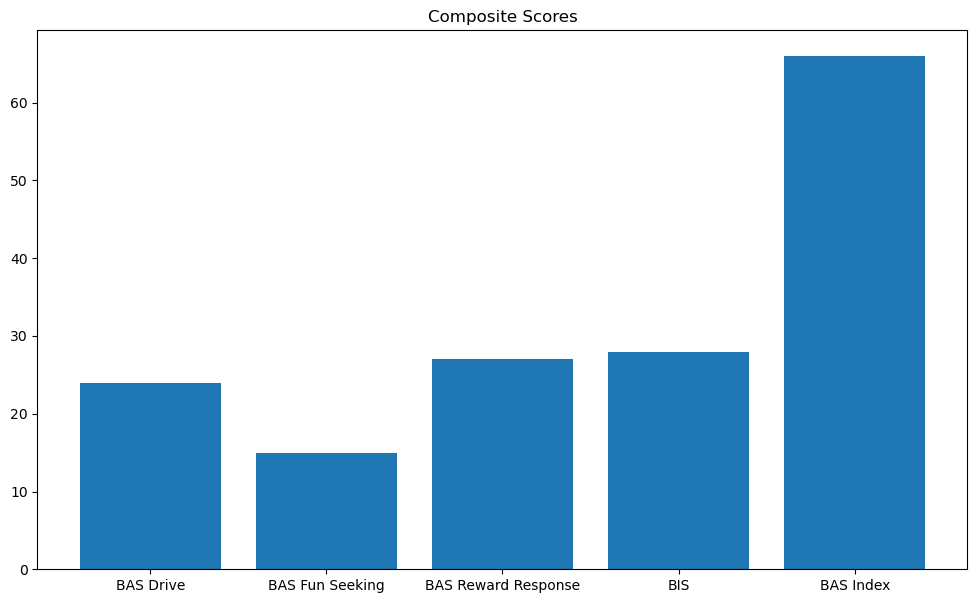

In [67]:
plt.rcParams["figure.figsize"] = (12,7)
plt.bar(['BAS Drive', 'BAS Fun Seeking', 'BAS Reward Response', 'BIS', 'BAS Index'], [swa(basd), swa(basf), swa(basr), swa(bis), swa(basind)])
plt.title('Composite Scores')

---

# SP/SR

In [68]:
dfspsr = dforig.iloc[:, 92:140]
dfspsr

,Please indicate if you agree or disagree with the statements below. [Do you often refrain from doing something because you are afraid of it being illegal?],Please indicate if you agree or disagree with the statements below. [Does the good prospect of obtaining money motivate you strongly to do some things?],Please indicate if you agree or disagree with the statements below. [Do you prefer not to ask for something if you are not sure you will obtain it?],"Please indicate if you agree or disagree with the statements below. [Are you frequently encouraged to act by the possibility of being valued in your work, in your studies, with your friends or with your family?]",Please indicate if you agree or disagree with the statements below. [Are you often afraid of new or unexpected situations?],Please indicate if you agree or disagree with the statements below. [Do you often meet people that you find physically attractive?],Please indicate if you agree or disagree with the statements below. [Is it difficult for you to telephone someone you do not know?],Please indicate if you agree or disagree with the statements below. [Do you like taking some drugs because of the pleasure you get from them?],Please indicate if you agree or disagree with the statements below. [Do you often renounce your rights when you know you can avoid a quarrel with a person or an organization?],Please indicate if you agree or disagree with the statements below. [Do you often do things to be praised?],...,"Please indicate if you agree or disagree with the statements below. [Comparing yourself to people you know, are you afraid of many things?]",Please indicate if you agree or disagree with the statements below. [Does your attention easily stray from your work in the presence of an attractive stranger?],Please indicate if you agree or disagree with the statements below. [Do you often find yourself worrying about things to the extent that performance in intellectual abilities is impaired?],Please indicate if you agree or disagree with the statements below. [Are you interested in money to the point of being able to do risky jobs?],Please indicate if you agree or disagree with the statements below. [Do you often refrain from doing something you like in order not to be rejected or disapproved by others?],Please indicate if you agree or disagree with the statements below. [Do you like to put competitive ingredients in all of your activities?],"Please indicate if you agree or disagree with the statements below. [Generally, do you pay more attention to threats than to pleasant events?]",Please indicate if you agree or disagree with the statements below. [Would you like to be a socially powerful person?],Please indicate if you agree or disagree with the statements below. [Do you often refrain from doing something because of your fear of being embarrassed?],Please indicate if you agree or disagree with the statements below. [Do you like displaying your physical abilities even though this may involve danger?]
0,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes
1,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,...,No,Yes,No,No,Yes,Yes,No,No,No,No


In [69]:
pun = np.array([1 , 3 , 5 , 7 , 9 , 11 , 13 , 15 , 17 , 19 , 21 , 23 , 25 , 27 , 29 , 31 , 33 , 35 , 37 , 39 , 41 , 43 , 45 , 47]) - 1
rew = np.array([2 , 4 , 6 , 8 , 10 , 12 , 14 , 16 , 18 , 20 , 22 , 24 , 26 , 28 , 30 , 32 , 34 , 36 , 38 , 40 , 42 , 44 , 46 , 48]) - 1

punishment = sr(np.array(dfspsr.iloc[:, pun] == 'Yes'))
reward = sr(np.array(dfspsr.iloc[:, rew] == 'Yes'))

spsr = np.stack((punishment, reward), axis=0)

pr = pd.DataFrame(spsr, index = ['Punishment', 'Reward'])
tpr = pd.DataFrame(sr(spsr), index = ['Punishment', 'Reward'], columns = ['Total'])

prtpr = pr.merge(tpr, left_index = True, right_index=True)

prtpr

,0,1,Total
Punishment,0,9,9
Reward,24,15,39


## Descriptive Statistics

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Total Punishment and Reward Sensitvity')

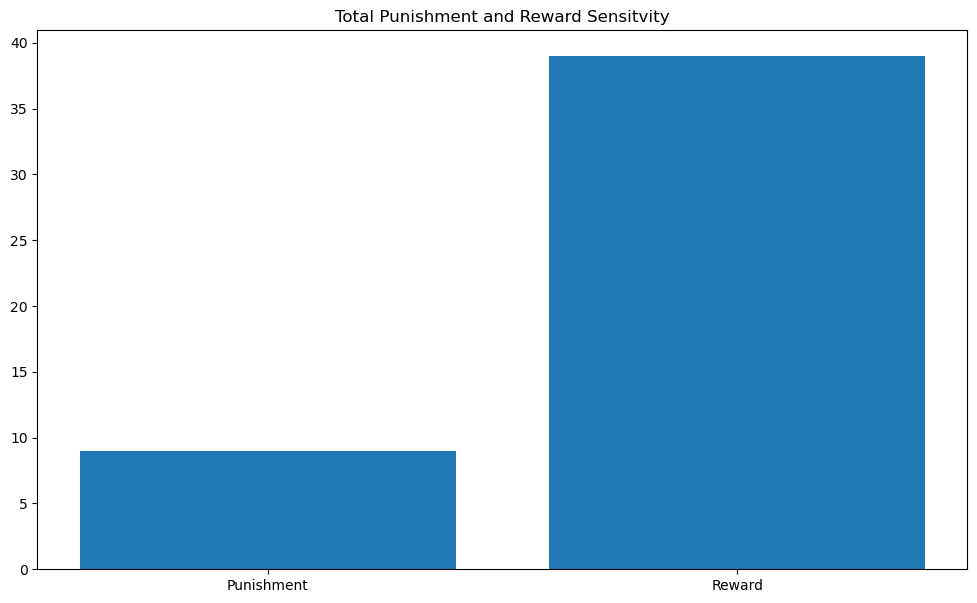

In [70]:
plt.bar(['Punishment', 'Reward'], prtpr["Total"])
plt.title("Total Punishment and Reward Sensitvity")

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Punishment Sensitvity per Participant')

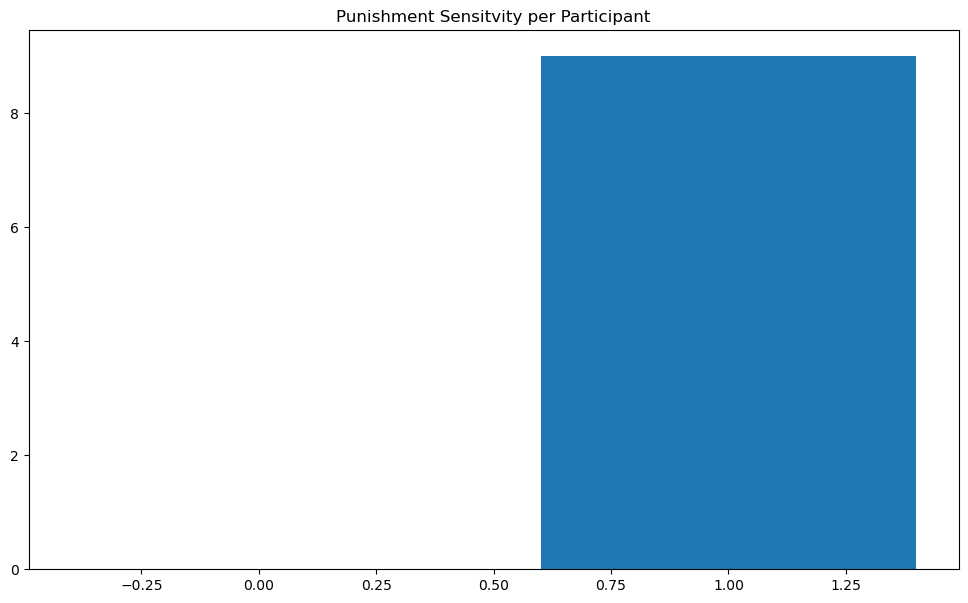

In [71]:
plt.bar(list(pr.columns), pr.loc['Punishment'])
plt.title("Punishment Sensitvity per Participant")

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Reward Sensitvity per Participant')

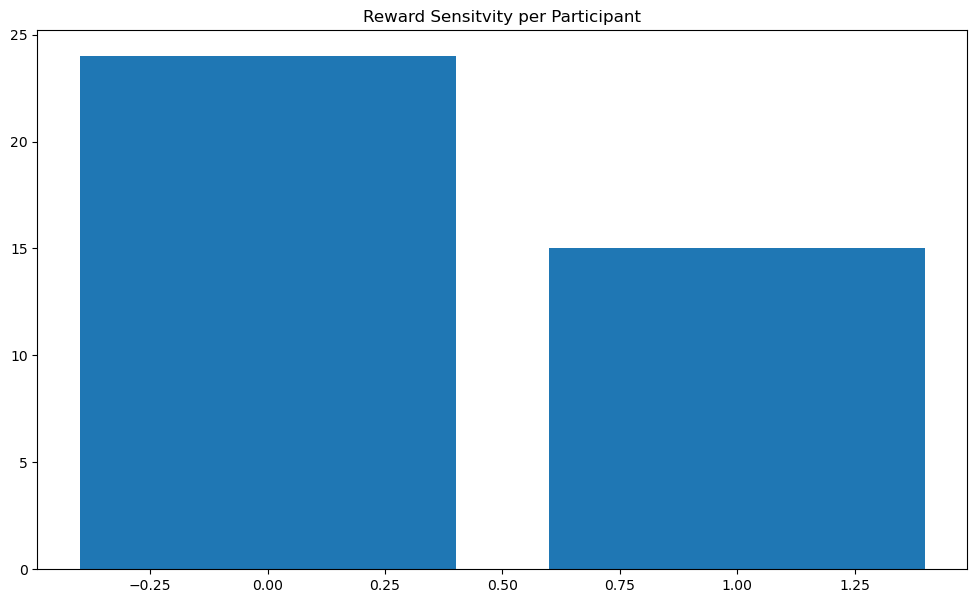

In [72]:
plt.bar(list(pr.columns), pr.loc['Reward'])
plt.title("Reward Sensitvity per Participant")

---

# PANAS

In [73]:
dfpanas = dforig.iloc[:, 140:150]
dfpanas

,Upset,Hostile,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Afraid,Active
0,1,2,3,4,5,1,2,3,4,5
1,3,3,4,3,3,2,3,3,3,3


---

# EHI-SF

In [74]:
dfehi = dforig.iloc[:, 151:155]
dfehi

,Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Throwing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Toothbrush],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Spoon]
0,Both equally,Usually Left,Both equally,Both equally
1,Always Right,Always Right,Always Right,Always Right


In [75]:
dic_ehi = {"Always Right": 2,
           "Usually Right": 1,
           "Both equally": 0,
           "Usually Left": -1,
           "Always Left": -2}

dfehi.replace(dic_ehi, inplace=True)

dfehi

,Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Throwing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Toothbrush],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Spoon]
0,0,-1,0,0
1,2,2,2,2


In [76]:
dfehi_array = np.array(dfehi)

dfehi["Total"] = 100*(sr(dfehi_array)/sr(abs(dfehi_array)))

def handedness(n):
    if n >= 100:
        return "Right handed"
    elif n >= 50 and n < 100:
        return "Mixed right handed"
    elif n < 50 and n > -50:
        return "Neutral"
    elif n <= -50 and n > -100:
        return "Mixed left handed"
    elif n <= -100:
        return "Left handed"

dfehi["Total"] = dfehi["Total"].apply(handedness)
dfehi

,Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Throwing],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Toothbrush],Please indicate your preferences in the use of hands in the following activities or when using certain objects [Spoon],Total
0,0,-1,0,0,Left handed
1,2,2,2,2,Right handed


## Count

<BarContainer object of 2 artists>

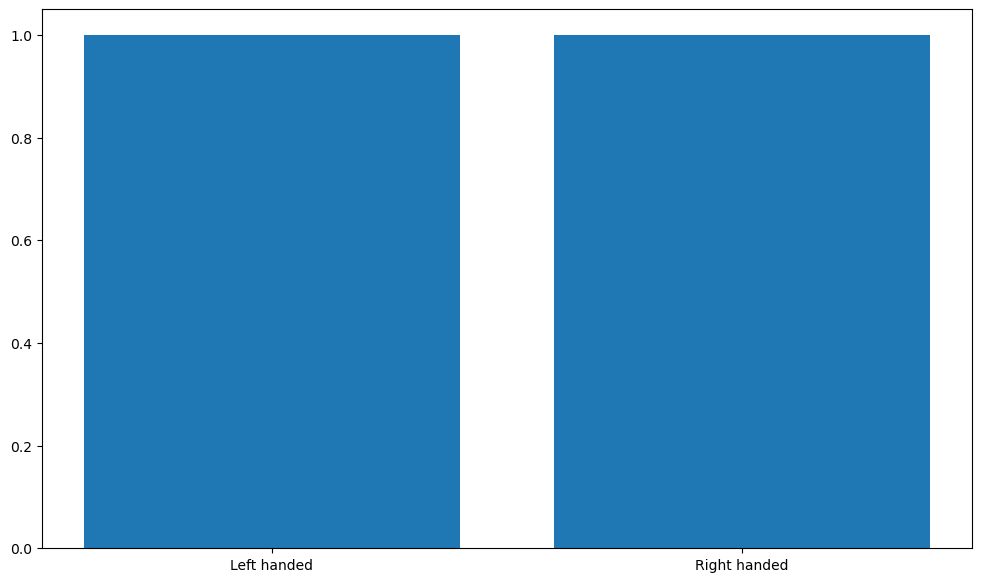

In [77]:
plt.bar(dfehi["Total"], dfehi["Total"].value_counts())

---

# Mindfulness Experience

In [78]:
dfme = dforig.iloc[:, 155:159]
dfme

,"Have you ever practiced meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, please briefly describe the kind of practice you engage in most frequently","If you responded 'yes' to the previous question, what is the total length of time (in months) you practiced/have been practicing meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, which option best describes the frequency of your typical practice of meditation, mindfulness, or contemplative prayer?"
0,No,NaN,NaN,Not currently practicing
1,Yes,Meditation,1 month,Not currently practicing


---

# FFMQ

In [102]:
dfffmq = dforig.iloc[:, 159:198]
dfffmq

,"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I’m good at finding words to describe my feelings.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I criticize myself for having irrational or inappropriate emotions.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I perceive my feelings and emotions without having to react to them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I do things, my mind wanders off and I’m easily distracted.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I take a shower or bath, I stay alert to the sensations of water on my body.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I can easily put my beliefs, opinions, and expectations into words.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I don’t pay attention to what I’m doing because I’m daydreaming, worrying, or otherwise distracted.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I watch my feelings without getting lost in them.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I tell myself I shouldn’t be feeling the way I’m feeling.],...,Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I think some of my emotions are bad or inappropriate and I shouldn’t feel them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I notice visual elements in art or nature, such as colors, shapes, textures, or patterns of light and shadow.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [My natural tendency is to put my experiences into words.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I just notice them and let them go.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I do jobs or tasks automatically without being aware of what I’m doing.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I judge myself as good or bad, depending on what the thought/image is about.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I pa

## Int and Reverse

In [103]:
mq = {'Never or Very Rarely True': 1,
      'Rarely True': 2,
      'Sometimes True': 3,
      'Often True': 4,
      'Very Often or Always True': 5}

dfffmq.replace(mq, inplace=True)

rev = [11, 15, 21, 4, 7, 12, 17, 22, 27, 33, 37, 2, 9, 13, 16, 24, 29, 34, 38]

dfffmq.iloc[:, rev] = 6 - dfffmq.iloc[:, rev]

dfffmq

,"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I’m good at finding words to describe my feelings.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I criticize myself for having irrational or inappropriate emotions.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I perceive my feelings and emotions without having to react to them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I do things, my mind wanders off and I’m easily distracted.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I take a shower or bath, I stay alert to the sensations of water on my body.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I can easily put my beliefs, opinions, and expectations into words.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I don’t pay attention to what I’m doing because I’m daydreaming, worrying, or otherwise distracted.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I watch my feelings without getting lost in them.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I tell myself I shouldn’t be feeling the way I’m feeling.],...,Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I think some of my emotions are bad or inappropriate and I shouldn’t feel them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I notice visual elements in art or nature, such as colors, shapes, textures, or patterns of light and shadow.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [My natural tendency is to put my experiences into words.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I just notice them and let them go.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I do jobs or tasks automatically without being aware of what I’m doing.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I judge myself as good or bad, depending on what the thought/image is about.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I pa

In [153]:
ffmq_array = np.array(dfffmq)

obv = sr(ffmq_array[:, [0, 5, 10, 14, 19, 25, 30, 35]])
des = sr(ffmq_array[:, [1, 6, 11, 15, 21, 26, 31, 36]])
awa = sr(ffmq_array[:, [4, 7, 12, 17, 22, 27, 33, 37]])
nj = sr(ffmq_array[:, [2, 9, 13, 16, 24, 29, 34, 38]])
nr = sr(ffmq_array[:, [3, 8, 18, 20, 23, 28, 32]])

stacked_total = np.stack([obv, des, awa, nj, nr], axis = 1)
ffmqtotal = pd.DataFrame(stacked_total, columns = ["Observing Total", "Describing Total", "ActAware Total", "Nonjudging Total", "Nonreactivity Total"])
ffmqtotal["Total"] = ffmqtotal.sum(axis=1)

stacked_mean = stacked_total/[8, 8, 8, 8, 7]
ffmqmean = pd.DataFrame(stacked_mean, columns = ["Observing Mean", "Describing Mean", "ActAware Mean", "Nonjudging Mean", "Nonreactivity Mean"])
ffmqmean["Overall Mean"] = ffmqtotal["Total"]/39

ffmqtotal
ffmqmean

,Observing Total,Describing Total,ActAware Total,Nonjudging Total,Nonreactivity Total,Total
0,26,28,23,26,28,131
1,22,25,24,26,21,118


,Observing Mean,Describing Mean,ActAware Mean,Nonjudging Mean,Nonreactivity Mean,Overall Mean
0,3.25,3.500,2.875,3.25,4.0,3.358974
1,2.75,3.125,3.000,3.25,3.0,3.025641


---

# STAI-T

In [179]:
dfstai = dforig.iloc[:, 198:219]
dfstai

,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel nervous and restless.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel satisfied with myself.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I wish I could be as happy as others seem to be.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel like a failure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel rested.],"Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am 'cool, calm, and collected'.]",Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel that difficulties are piling up so that I can't overcome them.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I worry too much over something that really doesn't matter.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am happy.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I have disturbing thoughts.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the it

## Int and Reverse

In [180]:
dic_t = {"Not at all": 1,
         "Somewhat": 2,
         "Moderately so": 3,
         "Very much so": 4}

dfstai.replace(dic_t, inplace = True)
rev = np.array([1,3, 6, 7, 10, 13,14, 16, 19])-1
dfstai.iloc[:, rev] = 5 - dfstai.iloc[:, rev]

dfstai["Total"] = dfstai.sum(axis=1)
dfstai

,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel nervous and restless.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel satisfied with myself.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I wish I could be as happy as others seem to be.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel like a failure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel rested.],"Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am 'cool, calm, and collected'.]",Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel that difficulties are piling up so that I can't overcome them.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I worry too much over something that really doesn't matter.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am happy.],...,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I take disappointments so keenly I can't put them out of my mind.],Please read 

## Descriptives

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Total Score per Participant')

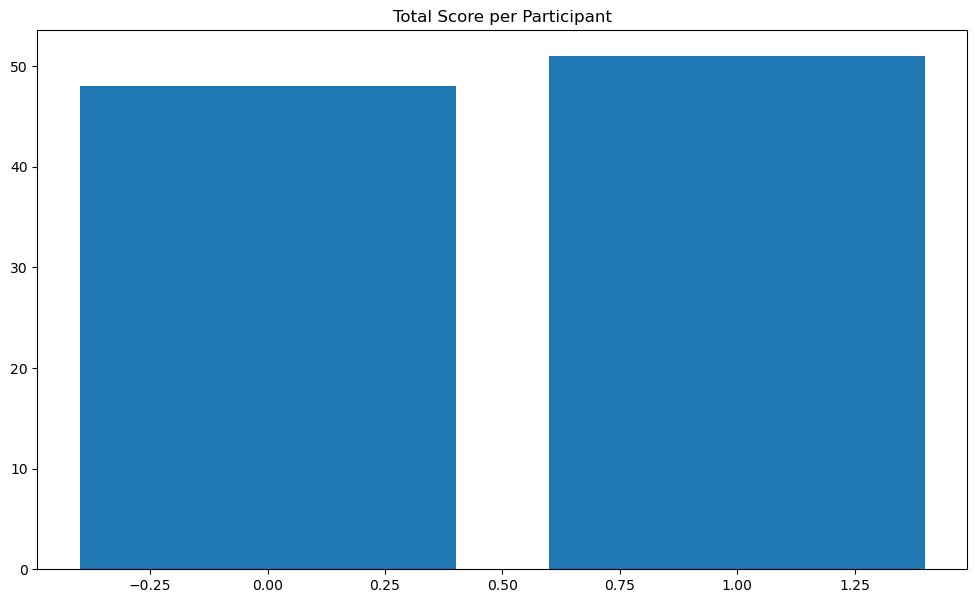

In [183]:
plt.bar(dfstai.index, dfstai["Total"])
plt.title("Total Score per Participant")